In [1]:
import json
from copy import deepcopy

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np

import fakedoocs as pydoocs
from fakedoocs import rosenbrock
from simplebo import SimpleBO

pydoocs not found, using fake instance for testing...


In [2]:
# load config
with open("conf/test_rosenbrock.json", "r") as f:
    config_dict = json.load(f)

noisy_config_dict = deepcopy(config_dict)
noisy_config_dict["fun_a"] = "NoisyRosenbrock"  # with observation noise

In [3]:
# construct optimizer object
bo = SimpleBO(
    config_dict, readonly=False, acquisition="UCB", n_init=10, 
    step_limit_type="proximal", proximal_len=0.5,
    )  # check proximal biasing
bo_noisy = SimpleBO(
    noisy_config_dict, readonly=False, acquisition="UCB", n_init=10, 
    step_limit_type="proximal", proximal_len=0.5,
    fixed_noise=True,
)
# bo = SimpleBO(config_dict, readonly=False, acquisition="UCB", step_limit_type="hard", step_size=0.1)

In [4]:
# run optimizer
# bo.max_steps = 100 # change opt. settings afterwards
bo.optimize(init_mode="random")
bo_noisy.optimize(init_mode="random")

In [5]:
xx, yy = np.meshgrid(np.linspace(bo.bounds[0,0], bo.bounds[1,0]),np.linspace(bo.bounds[0,1], bo.bounds[1,1]))
xin = np.stack([xx.flatten(), yy.flatten()]).T
zz = -np.array([rosenbrock(x) for x in xin]).reshape(xx.shape)

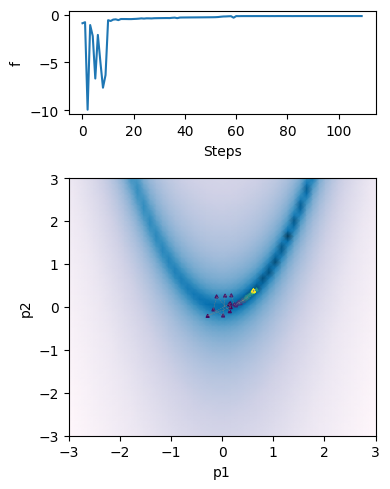

In [6]:
fig, axes = plt.subplots(2,1,height_ratios=[1,2.5], figsize=(4,5))
axes[0].plot(bo.Y.detach().numpy().flatten())
axes[0].set_xlabel("Steps")
axes[0].set_ylabel("f")
axes[1].pcolormesh(xx, yy, zz, norm=colors.LogNorm(vmin=zz.min(), vmax=zz.max()), cmap ='PuBu_r',shading="gouraud")
axes[1].plot(bo.X[:,0], bo.X[:,1], "--", c="gray",lw=0.3)
axes[1].scatter(bo.X[:,0], bo.X[:,1],s=4, c=list(range(len(bo.Y))), marker="^",zorder=1)
axes[1].set_xlabel("p1")
axes[1].set_ylabel("p2")
fig.tight_layout()

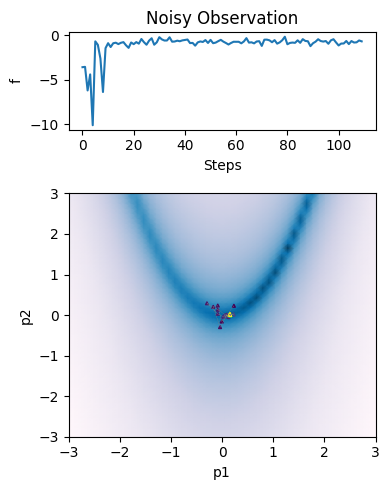

In [7]:
fig, axes = plt.subplots(2,1,height_ratios=[1,2.5], figsize=(4,5))
axes[0].plot(bo_noisy.Y.detach().numpy().flatten())
axes[0].set_xlabel("Steps")
axes[0].set_ylabel("f")
axes[1].pcolormesh(xx, yy, zz, norm=colors.LogNorm(vmin=zz.min(), vmax=zz.max()), cmap ='PuBu_r',shading="gouraud")
axes[1].plot(bo_noisy.X[:,0], bo_noisy.X[:,1], "--", c="gray",lw=0.3)
axes[1].scatter(bo_noisy.X[:,0], bo_noisy.X[:,1],s=4, c=list(range(len(bo_noisy.Y))), marker="^",zorder=1)
axes[1].set_xlabel("p1")
axes[1].set_ylabel("p2")
axes[0].set_title("Noisy Observation")
fig.tight_layout()

-0.15122928473174324 -0.6924200662042845


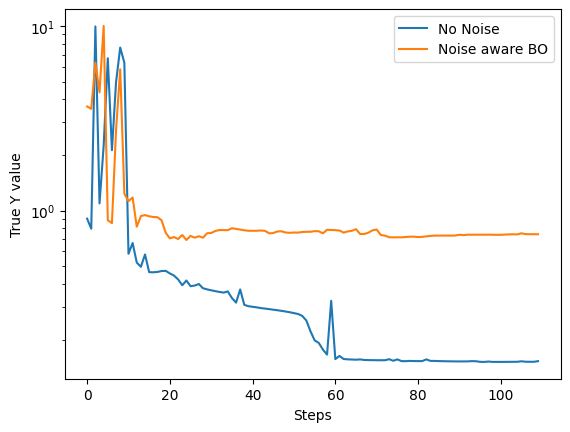

In [8]:
plt.plot(-bo.Y.detach().numpy().flatten(), label="No Noise")
y_noisy_true = np.array([rosenbrock(x) for x in bo_noisy.X.detach().numpy()])
plt.plot(-y_noisy_true, label='Noise aware BO')
plt.yscale("log")
plt.ylabel("True Y value")
plt.xlabel("Steps")
print(bo.Y.detach().numpy().max(), y_noisy_true.max())
plt.legend()


Text(0.5, 0, 'Steps')

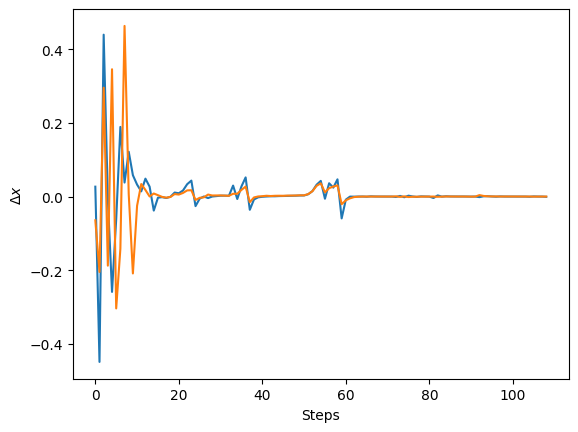

In [9]:
x = bo.X.detach().numpy()
dx = x[1:] - x[:-1]
plt.plot(dx)
plt.ylabel(r"$\Delta x$")
plt.xlabel("Steps")

In [10]:
bo.input_params

['test/variable/x1/value', 'test/variable/x2/value']